# Decision Tree
## Assignment

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [117]:
check = pd.read_csv("Fraud_check.csv")
check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [118]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [119]:
check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [120]:
check[check.duplicated()] #No Duplicated Rows

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [121]:
#Converting Target variable 'Taxable.Income' into categories Risky,good.
check['Taxable.Income'] = pd.cut( x = check['Taxable.Income'], bins = [10000,30000,100000], labels = ['Risky','good'])

In [122]:
check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


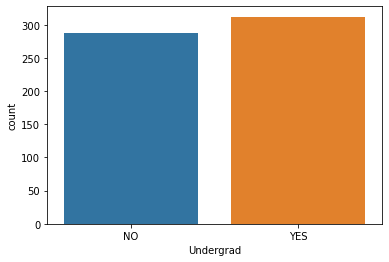

YES    312
NO     288
Name: Undergrad, dtype: int64

In [123]:
sns.countplot(check["Undergrad"])
plt.show()
check["Undergrad"].value_counts()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


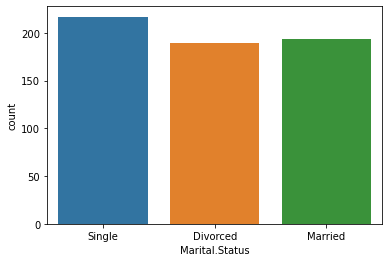

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [124]:
sns.countplot(check["Marital.Status"])
plt.show()
check["Marital.Status"].value_counts()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


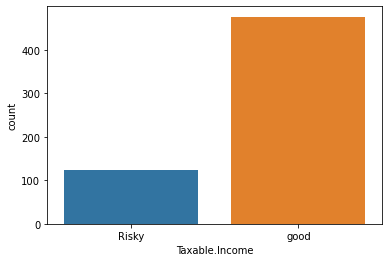

good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [125]:
sns.countplot(check["Taxable.Income"])
plt.show()
check["Taxable.Income"].value_counts()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


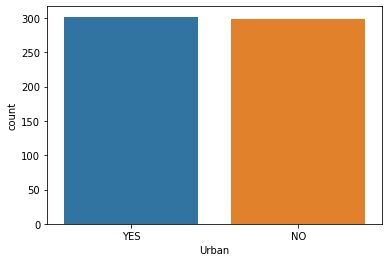

YES    302
NO     298
Name: Urban, dtype: int64

In [126]:
sns.countplot(check["Urban"])
plt.show()
check["Urban"].value_counts()

In [127]:
#Assigning Positive Numbers for all Categorical Variables/col.
from sklearn.preprocessing import LabelEncoder
check["Undergrad"] = LabelEncoder().fit_transform(check["Undergrad"])
check["Marital.Status"] = LabelEncoder().fit_transform(check["Marital.Status"])
check["Taxable.Income"] = LabelEncoder().fit_transform(check["Taxable.Income"])
check["Urban"] = LabelEncoder().fit_transform(check["Urban"])
check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


## Lets assume: Taxable_Income <= 30000 as Risky = 0.
## And others as Good = 1.

In [128]:
check.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,0.793333,108747.368333,15.558333,0.503333
std,0.500017,0.821958,0.405252,49850.075134,8.842147,0.500406
min,0.000000,0.000000,0.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,1.000000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,1.000000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,1.000000,199778.000000,30.000000,1.000000


In [52]:
check.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.012523,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.006081,-0.001564,-0.002213,0.064562
Taxable.Income,-0.012523,-0.006081,1.000000,-0.012225,0.001972,-0.004830
City.Population,0.079579,-0.001564,-0.012225,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,0.001972,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,-0.004830,-0.040098,-0.094559,1.000000


In [129]:
check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


## Normalization function 

In [130]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [131]:
# Normalized data frame
check_norm = norm_func(check)
check_norm.tail(7)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
593,0.0,0.0,1.0,0.610256,0.333333,1.0
594,0.0,0.5,1.0,0.412341,0.300000,1.0
595,1.0,0.0,1.0,0.078811,0.233333,1.0
596,1.0,0.0,1.0,0.170058,0.066667,1.0
597,0.0,0.0,1.0,0.737240,0.000000,1.0
598,1.0,0.5,1.0,0.886810,0.566667,0.0
599,0.0,0.0,1.0,0.760683,0.533333,0.0


In [132]:
X = check.drop(["Taxable.Income"],axis = 1)
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [133]:
Y = check["Taxable.Income"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int32

In [134]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

# Building Model by CART method.

In [135]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

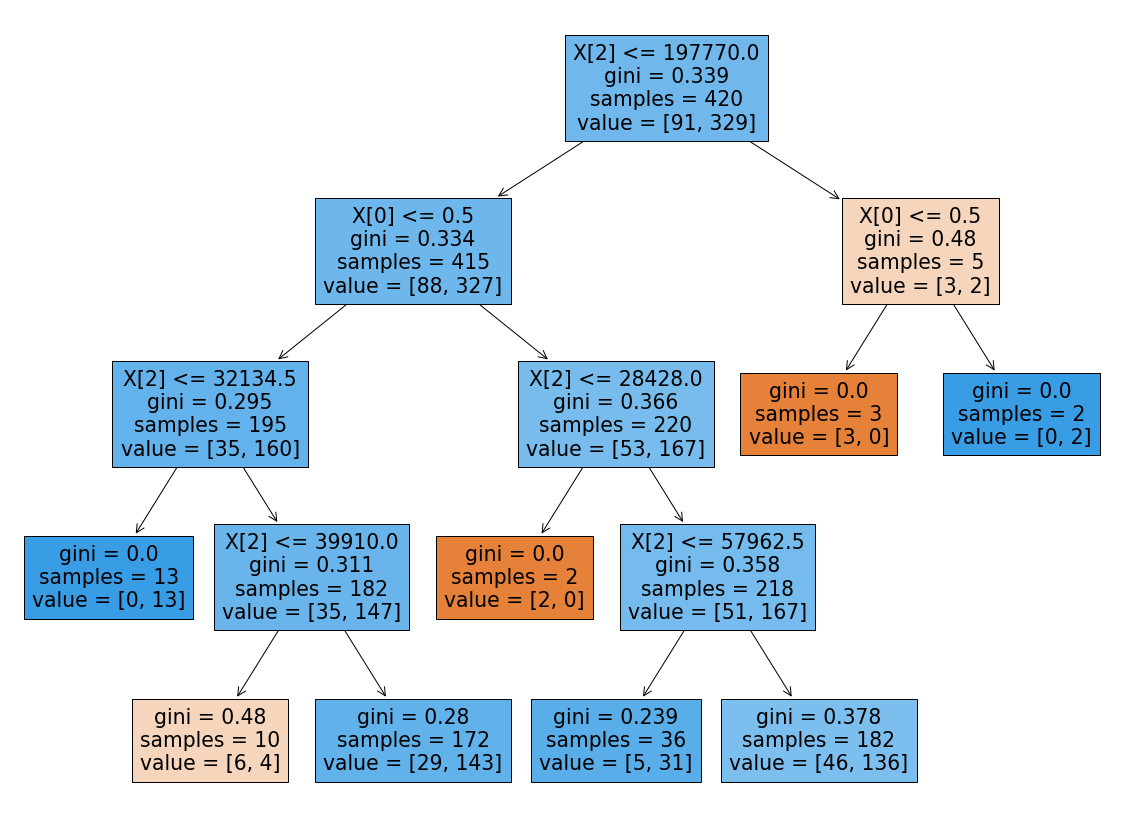

In [136]:
from sklearn import tree
#plotting Decision ree
fig = plt.figure(figsize = (20,15))
tree.plot_tree(model_gini, filled = True)
plt.show()

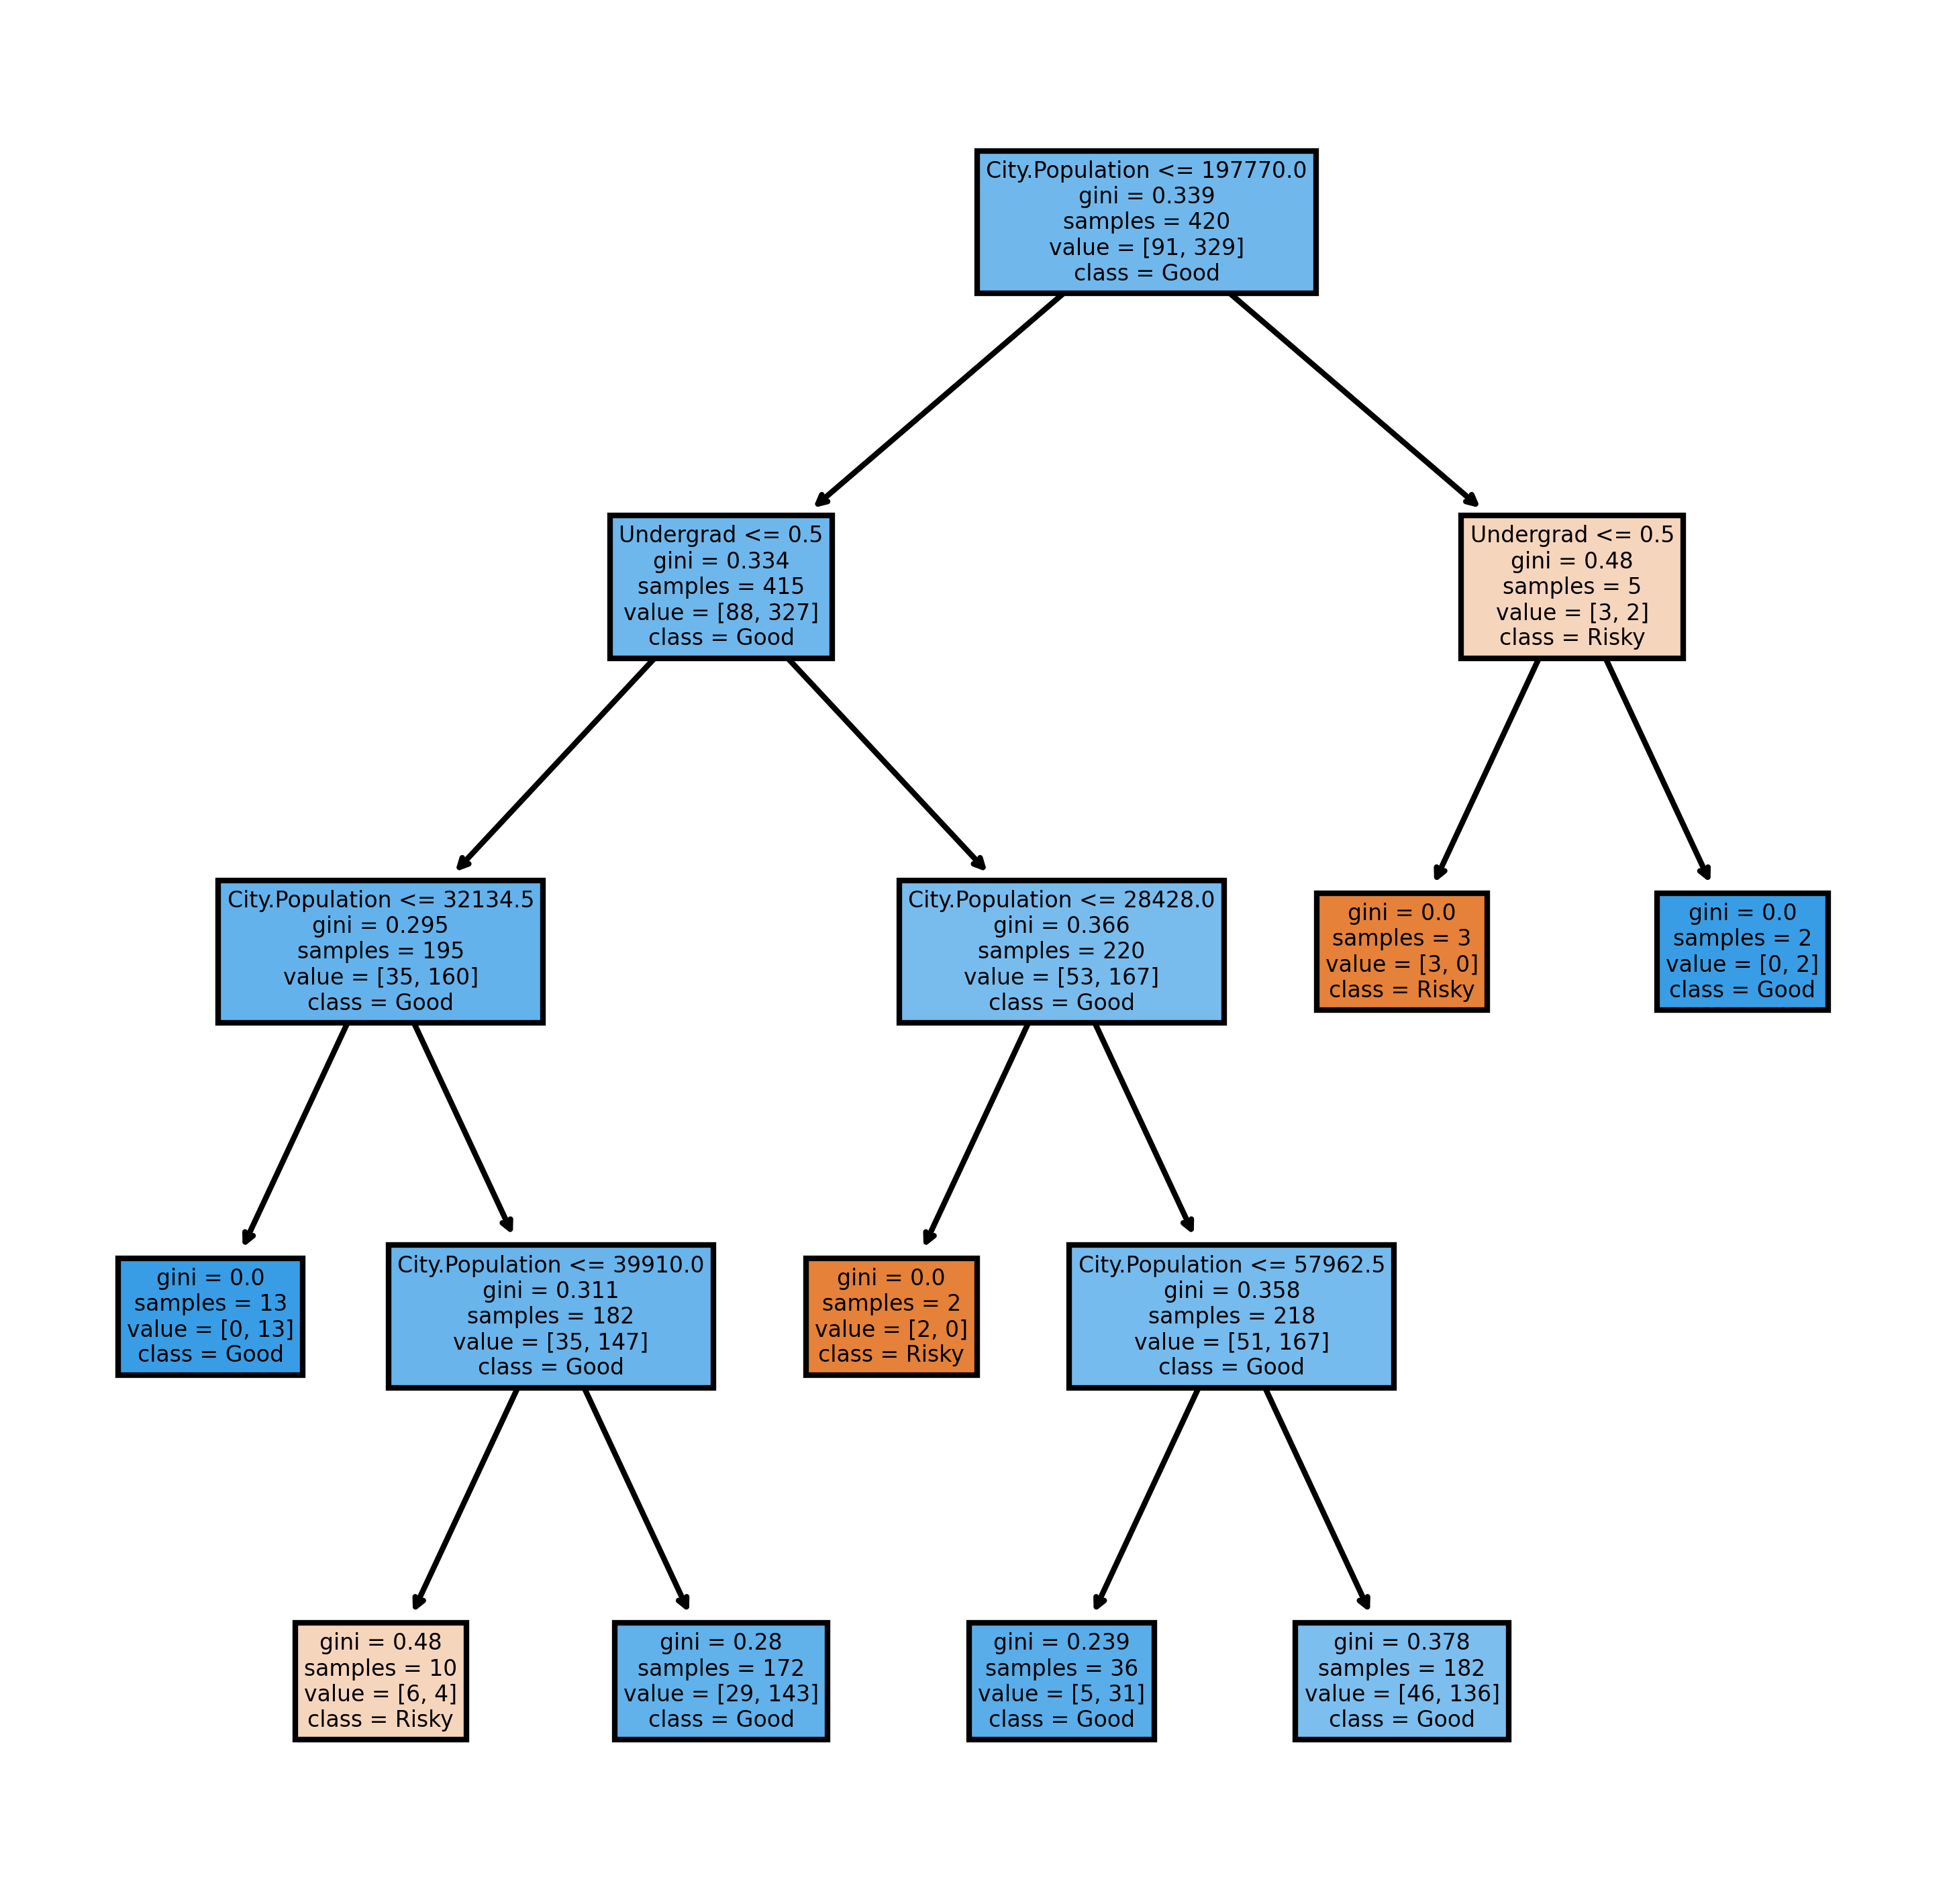

In [137]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.show()

# Model Prediction

In [138]:
#prediction test data
pred_x_test = model_gini.predict(x_test)

In [139]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
# Checking accuracy of model
accuracy_score(y_test,pred_x_test)

0.7777777777777778

In [140]:
confusion_matrix(y_test,pred_x_test)

array([[  0,  33],
       [  7, 140]], dtype=int64)

In [141]:
#prediction train data
pred_x_train = model_gini.predict(x_train)

In [142]:
# Checking accuracy of model
accuracy_score(y_train,pred_x_train)

0.8

In [143]:
confusion_matrix(y_train,pred_x_train)

array([[ 11,  80],
       [  4, 325]], dtype=int64)

## OR
## Also we can calculate accuracy like this

In [144]:
model_gini.score(x_test,y_test)

0.7777777777777778

# Building Model by C5.0 method.

In [145]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

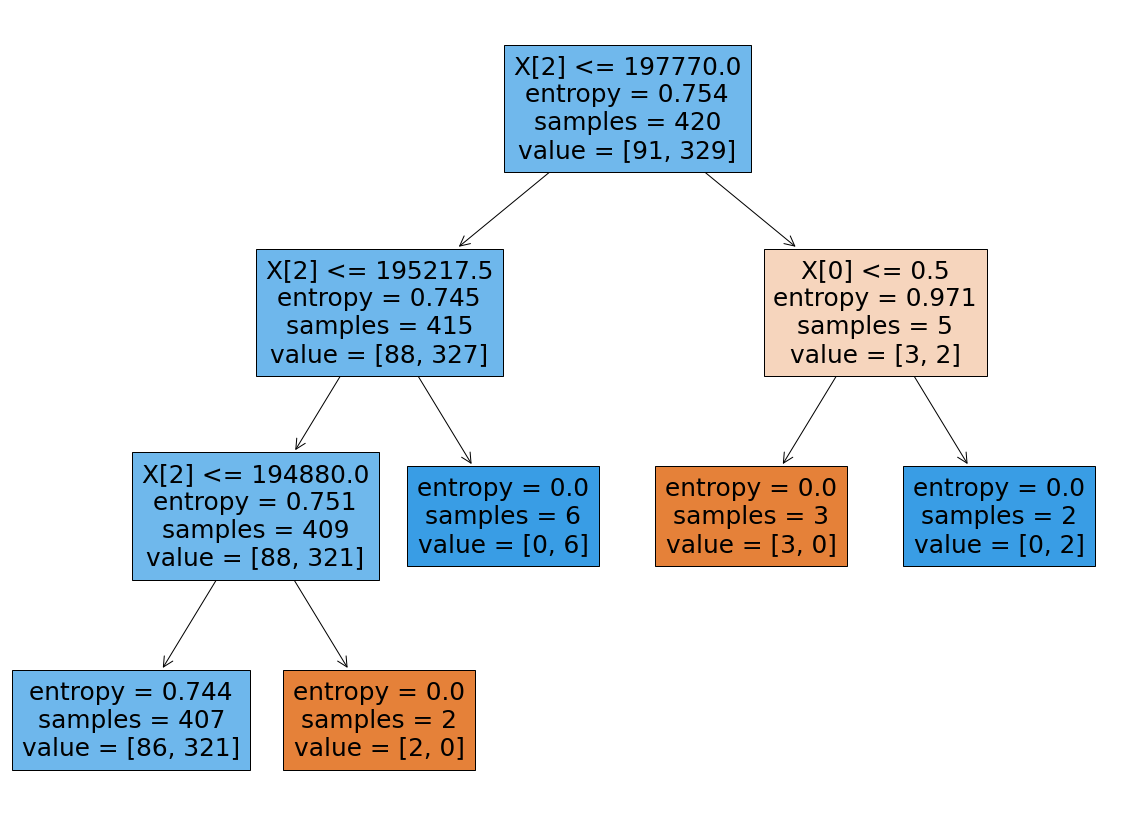

In [146]:
#Plotting Decision tree
fig = plt.figure(figsize = (20,15))
tree.plot_tree(model_entropy, filled = True)
plt.show()

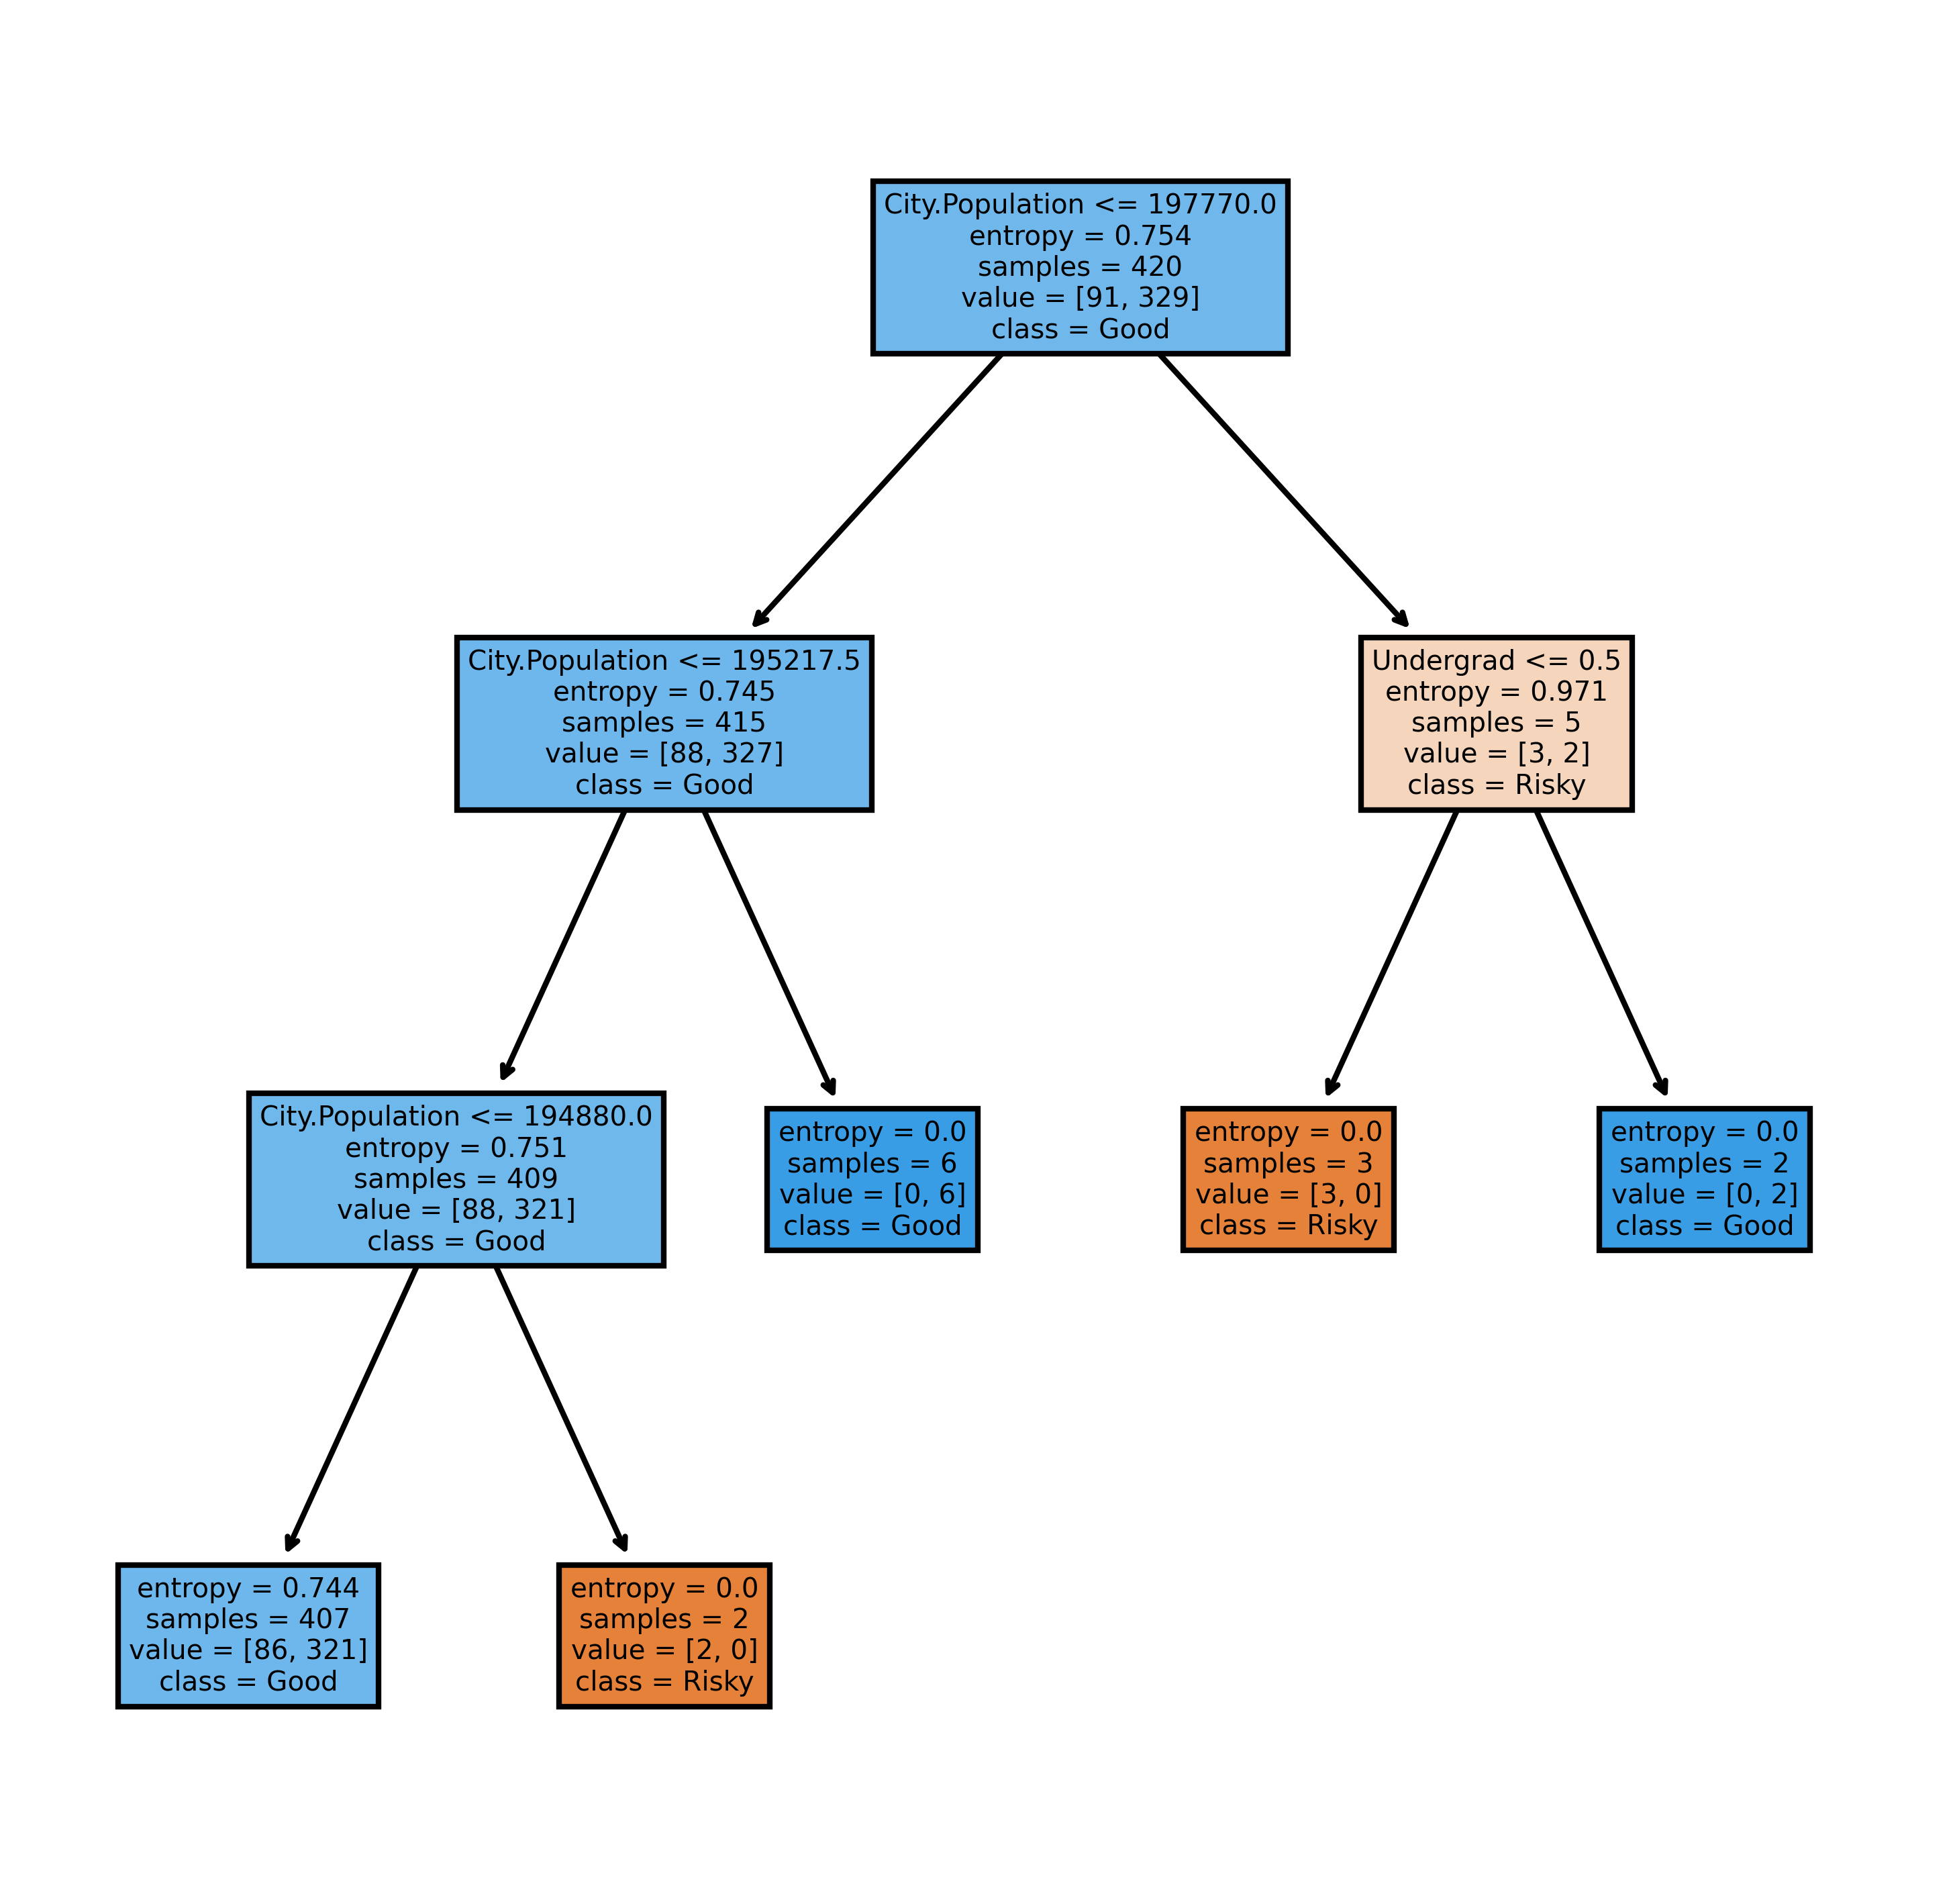

In [147]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.show()

# Model Prediction

In [148]:
preds = model_entropy.predict(x_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [149]:
pd.Series(preds).value_counts()

1    178
0      2
dtype: int64

In [150]:
#Model Accuracy
accuracy_score(y_test,preds)

0.8055555555555556

## OR

In [155]:
print("Model Accuracy:-",round((model_entropy.score(x_test,y_test))*100,2),"%")

Model Accuracy:- 80.56 %


## OR

In [156]:
#Model Accuracy
np.mean(preds == y_test)

0.8055555555555556

In [157]:
confusion_matrix(y_test,preds)

array([[  0,  33],
       [  2, 145]], dtype=int64)